In [27]:
#Yogita's CASE STUDY

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Relevant dataset:
df=pd.read_csv('/content/ecommerce_analysis.csv')
display(df.head())

product_id = df['product_id']
product_name = df['product_name']
category = df['category']
price = df['price']
review_score = df['review_score']
review_count = df['review_count']
sales_month_1 = df['sales_month_1']
sales_month_2 = df['sales_month_2']
sales_month_3 = df['sales_month_3']
sales_month_4 = df['sales_month_4']
sales_month_5 = df['sales_month_5']
sales_month_6 = df['sales_month_6']
sales_month_7 = df['sales_month_7']
sales_month_8 = df['sales_month_8']
sales_month_9	= df['sales_month_9']
sales_month_10 = df['sales_month_10']
sales_month_11 = df['sales_month_11']
sales_month_12 = df['sales_month_12']

,product_id,product_name,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12
0,1,Product_1,Clothing,190.40,1.7,220,479.0,449,92,784.0,604.0,904,446,603.0,807,252,695,306
1,2,Product_2,Home & Kitchen,475.60,3.2,903,21.0,989,861,863.0,524.0,128,610,436.0,176,294,772,353
2,3,Product_3,Toys,367.34,4.5,163,348.0,558,567,143.0,771.0,409,290,828.0,340,667,267,392
3,4,Product_4,Toys,301.34,3.9,951,725.0,678,59,15.0,937.0,421,670,933.0,56,157,168,203
4,5,Product_5,Books,82.23,4.2,220,682.0,451,649,301.0,620.0,293,411,258.0,854,548,770,257


In [26]:
# 2. Novel this dataset

# Explore basic statistics and data types
print(f"Overview of Data: \n {df.info()}")  # Get an overview of the data, including column types and missing values
print(f"Descriptive Statistics of Columns: \n{df.describe()}")  # Show descriptive statistics for numerical columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      1000 non-null   int64  
 1   product_name    1000 non-null   object 
 2   category        1000 non-null   object 
 3   price           1000 non-null   float64
 4   review_score    1000 non-null   float64
 5   review_count    1000 non-null   int64  
 6   sales_month_1   1000 non-null   float64
 7   sales_month_2   1000 non-null   int64  
 8   sales_month_3   1000 non-null   int64  
 9   sales_month_4   999 non-null    float64
 10  sales_month_5   999 non-null    float64
 11  sales_month_6   1000 non-null   int64  
 12  sales_month_7   1000 non-null   int64  
 13  sales_month_8   999 non-null    float64
 14  sales_month_9   1000 non-null   int64  
 15  sales_month_10  1000 non-null   int64  
 16  sales_month_11  1000 non-null   int64  
 17  sales_month_12  1000 non-null   in

In [19]:
# 3. Data cleaning in the dataset

# Identifying Missing Values in the dataset
print(f"Checking for any missing value present:\n {df.isnull().sum()}")  # Count missing values in each column

# Checking for duplicate rows
print(f"Checking for any duplicate rows present: {df.duplicated().sum()}")

# Replacing missing value in "sales_month_1" with the median value
median_sales_month_1 = df['sales_month_1'].median()
df['sales_month_1'].fillna(median_sales_month_1, inplace=True)
print(f"Replaced missing value: {median_sales_month_1}")

# Detection of outliers in "price" column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
print("Outliers in 'price' column:")
print(outliers)

# Replacing outliers with the median value
median_price = df['price'].median()
df.loc[df['price'] < lower_bound, 'price'] = median_price
df.loc[df['price'] > upper_bound, 'price'] = median_price
print(f"Replaced outliers: {median_price}")

Checking for any missing value present:
 product_id        0
product_name      0
category          0
price             0
review_score      0
review_count      0
sales_month_1     0
sales_month_2     0
sales_month_3     0
sales_month_4     1
sales_month_5     1
sales_month_6     0
sales_month_7     0
sales_month_8     1
sales_month_9     0
sales_month_10    0
sales_month_11    0
sales_month_12    0
dtype: int64
Checking for any duplicate rows present: 0
Replaced missing value: 508.0
Outliers in 'price' column:
Empty DataFrame
Columns: [product_id, product_name, category, price, review_score, review_count, sales_month_1, sales_month_2, sales_month_3, sales_month_4, sales_month_5, sales_month_6, sales_month_7, sales_month_8, sales_month_9, sales_month_10, sales_month_11, sales_month_12]
Index: []
Replaced outliers: 250.92


Table of cleaned data:
         product_id        price  review_score  review_count  sales_month_1  \
count  1000.000000  1000.000000   1000.000000   1000.000000    1000.000000   
mean    500.500000   247.677130      3.027600    526.506000     498.814000   
std     288.819436   144.607983      1.171243    282.269932     289.512243   
min       1.000000     7.290000      1.000000      1.000000       0.000000   
25%     250.750000   121.810000      2.000000    283.750000     246.000000   
50%     500.500000   250.920000      3.100000    543.000000     508.000000   
75%     750.250000   373.435000      4.000000    772.000000     740.750000   
max    1000.000000   499.860000      5.000000    999.000000    1000.000000   

       sales_month_2  sales_month_3  sales_month_4  sales_month_5  \
count    1000.000000    1000.000000     999.000000     999.000000   
mean      507.661000     506.739000     504.324324     487.674675   
std       285.992689     294.010873     286.350194     287.586675 

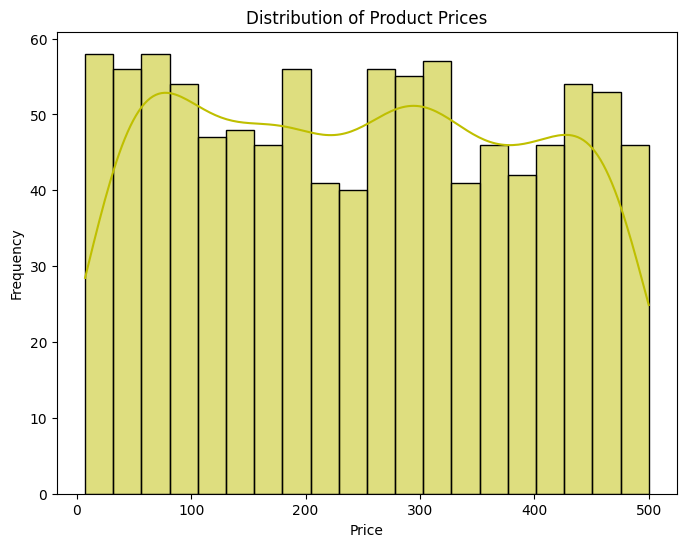

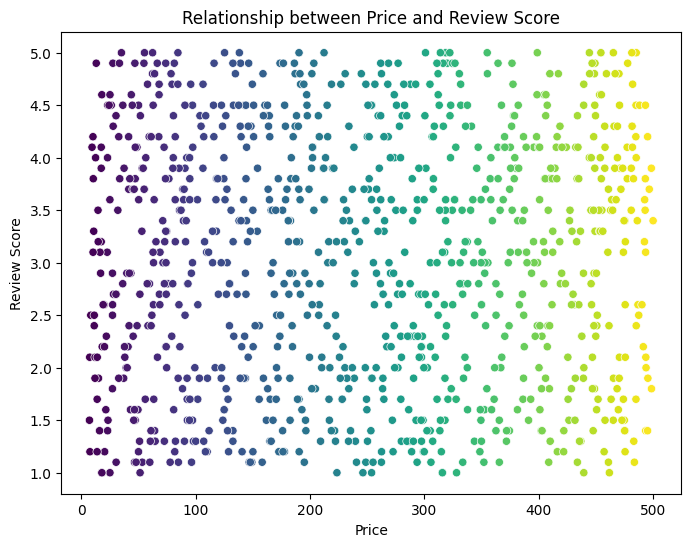

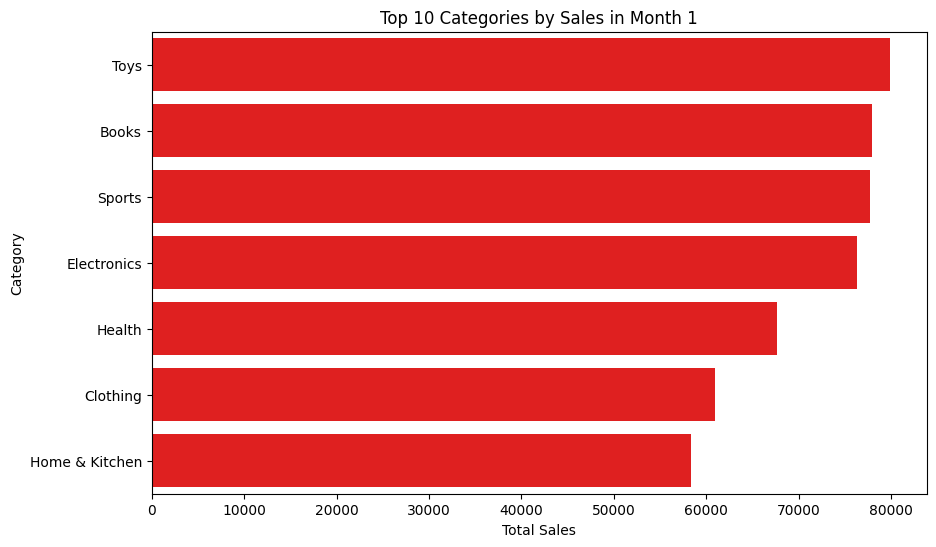

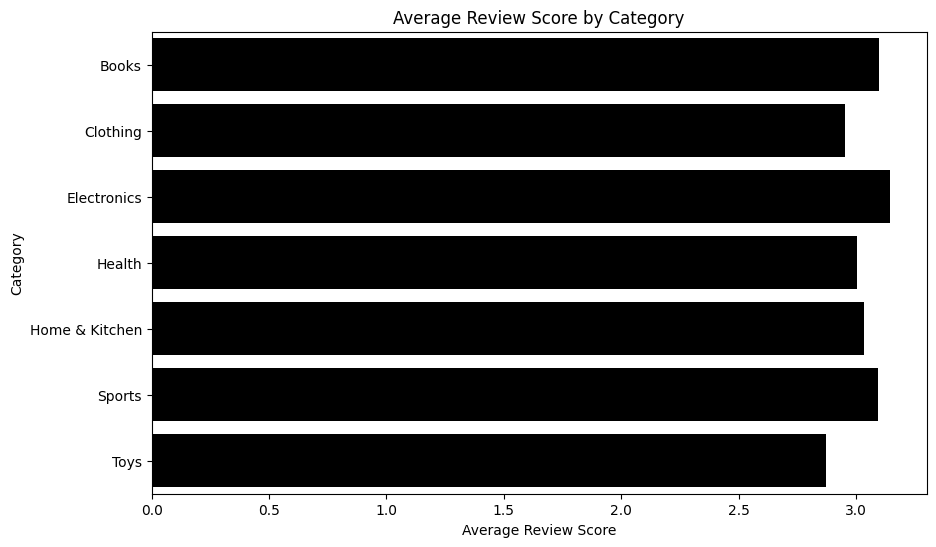

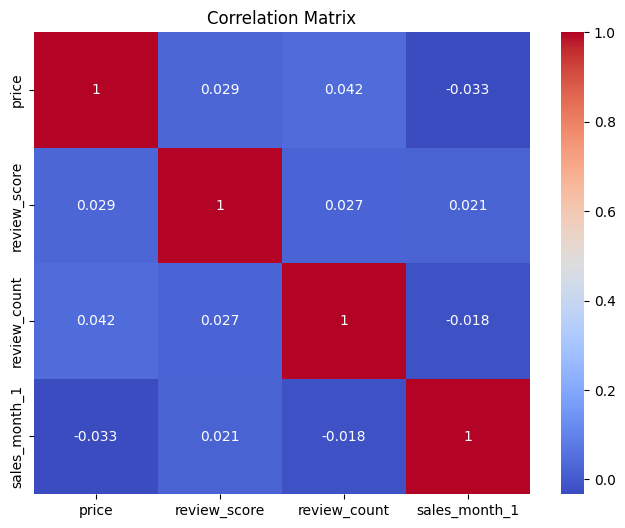

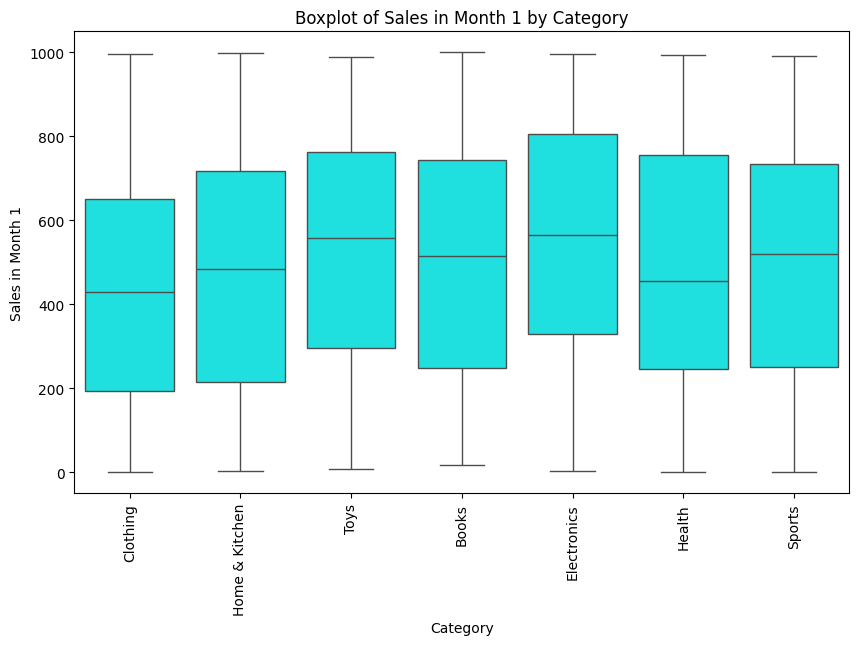

In [25]:
# 4.Relevant graphs and tables depicting clean data

# Table showing basic statistics of the cleaned data
print(f"Table of cleaned data:\n {df.describe()}")

# a) Distribution of Product Prices
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], bins=20, kde=True, color='y')
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


# b) Relationship between Price and Review Score
plt.figure(figsize=(8, 6))
sns.scatterplot(x='price', y='review_score', data=df,c=price, cmap='viridis')
plt.title('Relationship between Price and Review Score')
plt.xlabel('Price')
plt.ylabel('Review Score')
plt.show()


# c) Top 10 Categories by Sales in Month 1
top_10_categories_month_1 = df.groupby('category')['sales_month_1'].sum().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_categories_month_1.values, y=top_10_categories_month_1.index, color='red')
plt.title('Top 10 Categories by Sales in Month 1')
plt.xlabel('Total Sales')
plt.ylabel('Category')
plt.show()


# d) Average Review Score by Category
average_review_score_by_category = df.groupby('category')['review_score'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=average_review_score_by_category.values, y=average_review_score_by_category.index, color='k')
plt.title('Average Review Score by Category')
plt.xlabel('Average Review Score')
plt.ylabel('Category')
plt.show()


# e) Correlation Matrix
correlation_matrix = df[['price', 'review_score', 'review_count', 'sales_month_1']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# f) Boxplot of Sales in Month 1 by Category
plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='sales_month_1', data=df, color='cyan')
plt.title('Boxplot of Sales in Month 1 by Category')
plt.xlabel('Category')
plt.ylabel('Sales in Month 1')
plt.xticks(rotation=90)
plt.show()